<a href="https://colab.research.google.com/github/dauparas/tensorflow_examples/blob/master/tf_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression with Tensorflow

A simple linear regression example using tf.Data for feeding data.

In [0]:
#Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [0]:
#Create some data
np.random.seed(0)
x = np.random.uniform(0,1,100) 
y = 1.2*x + 0.1*np.random.randn(x.shape[0])

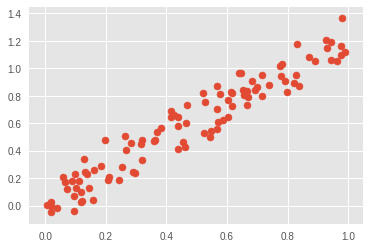

In [28]:
#Plot the data
plt.scatter(x, y);

In [0]:
#Reset the graph 
tf.reset_default_graph()

#Parameters
learning_rate = 0.01
batch_size = 10
repeat_data = 1
n_epochs = 100

#Create placeholders
LEARNING_RATE = tf.placeholder(tf.float32, shape=[], name='LEARNING_RATE')
BATCH_SIZE = tf.placeholder(tf.int64, name='BATCH_SIZE')
REPEAT_DATA = tf.placeholder(tf.int64, name='REPEAT_DATA')

train_data = (x.astype(np.float32), y.astype(np.float32))
train_data = tf.data.Dataset.from_tensor_slices(train_data)
train_data = train_data.shuffle(buffer_size=10000)
train_data = train_data.repeat(REPEAT_DATA)
train_data = train_data.batch(BATCH_SIZE)

iterator = tf.data.Iterator.from_structure(train_data.output_types, train_data.output_shapes)
X, Y = iterator.get_next()
train_init = iterator.make_initializer(train_data)	# initializer for train_data

#Create variables
A = tf.get_variable('A', shape=[1], dtype=tf.float32, initializer=tf.random_normal_initializer())
B = tf.get_variable('B', shape=[1], dtype=tf.float32, initializer=tf.zeros_initializer())

#Create a linear model
y_pred = A*X + B

#Define a loss function
loss = tf.reduce_sum(tf.square(y_pred-Y), axis=0)

#Define an optimizer
optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)

In [30]:
#Create a TF session:
saver = tf.train.Saver()
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(n_epochs):
    learning_rate = 0.1 - 0.05*((i+1)/n_epochs) #variable learning rate
    batch_size = np.int(2+20*((i+1)/n_epochs)) #variable batch size
    sess.run(train_init, feed_dict={BATCH_SIZE: batch_size, REPEAT_DATA: repeat_data})
    total_loss = 0
    n_batches = 0
    try:
      while True:
        _, batch_loss = sess.run([optimizer, loss], feed_dict={LEARNING_RATE: learning_rate})
        total_loss += batch_loss
        n_batches += 1
    except tf.errors.OutOfRangeError:
      pass
    if (i+1)% 10 == 0 or i == 0:
      print('Epoch: {0}, Loss: {1}'.format((i+1), total_loss))
    a, b = sess.run([A, B])
  save_path = saver.save(sess, "./tmp/linear.ckpt")
  print("Model saved in path: %s" % save_path)

Epoch: 1, Loss: 29.182401387020946
Epoch: 10, Loss: 1.0496610403060913
Epoch: 20, Loss: 1.09869724791497
Epoch: 30, Loss: 1.0064367316663265
Epoch: 40, Loss: 1.032932123169303
Epoch: 50, Loss: 1.092374186962843
Epoch: 60, Loss: 1.3093737363815308
Epoch: 70, Loss: 1.440146267414093
Epoch: 80, Loss: 1.0578739196062088
Epoch: 90, Loss: 1.0237897485494614
Epoch: 100, Loss: 1.0276433676481247
Model saved in path: ./tmp/linear.ckpt


[1.2055532] [0.02351702]


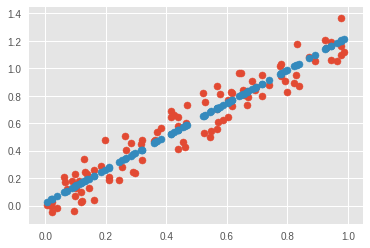

In [31]:
plt.scatter(x, y);
plt.scatter(x, a*x+b);
print(a, b)

In [32]:
tf.reset_default_graph()

# Create some variables.
A = tf.get_variable('A', shape=[1], dtype=tf.float32)
B = tf.get_variable('B', shape=[1], dtype=tf.float32)

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "./tmp/linear.ckpt")
  print("Model restored.")
  # Check the values of the variables
  print("A : %s" % A.eval())
  print("B : %s" % B.eval())

INFO:tensorflow:Restoring parameters from ./tmp/linear.ckpt
Model restored.
A : [1.2055532]
B : [0.02351702]
